# The goal is to analyze borrower and loan data to predict the likelihood of loan default, helping financial institutions reduce risk and improve lending strategies.

# 1. Data Import and Initial Exploration

### Import all the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Load the dataset 

In [2]:
df = pd.read_csv('loan.csv')

### Learn the data 

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.tail(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
print(f'The number of rows : {df.shape[0]}, the number of columns : {df.shape[1]} and the total size of data is : {df.size}') 

The number of rows : 39717, the number of columns : 111 and the total size of data is : 4408587


In [7]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# 2. Data Cleaning001: Handling Missing Values and Duplicates 

### Checking for null values : 

In [9]:
df.isnull().any().value_counts()

True     68
False    43
Name: count, dtype: int64

### Since the number of columns having null values is 68, we are going to check how many columns have a total of 100% missing values 

In [10]:
((df.isnull().sum()/len(df)*100).round(2)).value_counts()

100.00    54
0.00      43
0.14       2
32.59      1
0.03       1
6.19       1
2.71       1
92.99      1
64.66      1
0.13       1
0.18       1
0.01       1
97.13      1
1.75       1
0.10       1
Name: count, dtype: int64

### Removing all the columns that has 100% missing values, then cleaning the remaining columns 

In [11]:
df = df.dropna(axis=1, how='all')

In [12]:
df.isnull().any().value_counts()

False    43
True     14
Name: count, dtype: int64

### Checking for the remaining null values 

In [13]:
mv = df.isnull().sum()
mp = (mv / len(df)) * 100

data = pd.DataFrame({'Missing Values': mv, 'Missing Percent': mp.round(2)})
data = data.sort_values(by='Missing Percent', ascending=False)

values = data[data['Missing Percent'] > 0]
values

,Missing Values,Missing Percent
next_pymnt_d,38577,97.13
mths_since_last_record,36931,92.99
mths_since_last_delinq,25682,64.66
desc,12942,32.59
emp_title,2459,6.19
emp_length,1075,2.71
pub_rec_bankruptcies,697,1.75
last_pymnt_d,71,0.18
collections_12_mths_ex_med,56,0.14
chargeoff_within_12_mths,56,0.14


### Removing all the columns that has >30% missing values 

In [14]:
df.drop(columns = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc'], inplace = True)

### Cleaning the data 

In [15]:
null_cols = df.columns[df.isnull().any()]
null_cols

Index(['emp_title', 'emp_length', 'title', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [16]:
df[null_cols].dtypes

emp_title                      object
emp_length                     object
title                          object
revol_util                     object
last_pymnt_d                   object
last_credit_pull_d             object
collections_12_mths_ex_med    float64
chargeoff_within_12_mths      float64
pub_rec_bankruptcies          float64
tax_liens                     float64
dtype: object

In [17]:
df[null_cols].head()

,emp_title,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Computer,83.70%,Jan-15,May-16,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,bike,9.40%,Apr-13,Sep-13,0.0,0.0,0.0,0.0
2,NaN,10+ years,real estate business,98.50%,Jun-14,May-16,0.0,0.0,0.0,0.0
3,AIR RESOURCES BOARD,10+ years,personel,21%,Jan-15,Apr-16,0.0,0.0,0.0,0.0
4,University Medical Group,1 year,Personal,53.90%,May-16,May-16,0.0,0.0,0.0,0.0


### Replacing the Nans on these columns : 'emp_title', 'title' 

In [18]:
df['emp_title'].fillna('unknown', inplace=True)
df['title'].fillna(df['title'].mode()[0], inplace = True)

### Removing the Nans on these columns : 'last_pymnt_d', 'last_credit_pull_d' and converting the dtypes

In [19]:
cols = ['last_pymnt_d', 'last_credit_pull_d']
for col in cols: 
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = pd.to_datetime(df[col], format = '%b-%y')

### Removing '%' on the column 'revol_util', converting to its dtype and replacing the Nan values

In [20]:
df['revol_util'] = df['revol_util'].str.strip('%').astype(float)
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

### replacing Nans on these columns : 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens' using its mean 

In [21]:
cols = ['collections_12_mths_ex_med','chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']
for col in cols:
    df[col].fillna(df[col].mean(), inplace = True)

### Replacing Nans for 'emp_length' column

In [22]:
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace = True)

### Checking if there are any Nans 

In [23]:
df.isnull().any().value_counts()

False    53
Name: count, dtype: int64

### Checking if there are any duplicates

In [24]:
df.duplicated().any()

np.False_

# 3. Feature Reduction: Removing Irrelevant Columns

In [25]:
numerical_cols = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
    'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
    'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
    'last_pymnt_amnt', 'pub_rec_bankruptcies', 'int_rate'
]
for col in numerical_cols:
    print(f'Columns : {col}')
    print(df[col].value_counts(), "\n")

Columns : loan_amnt
loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
18125       1
23050       1
11175       1
21825       1
10475       1
Name: count, Length: 885, dtype: int64 

Columns : funded_amnt
funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
950         1
700         1
725         1
1175        1
4825        1
Name: count, Length: 1041, dtype: int64 

Columns : funded_amnt_inv
funded_amnt_inv
5000.0000     1309
10000.0000    1275
6000.0000     1200
12000.0000    1069
8000.0000      900
              ... 
565.2900         1
1100.7900        1
979.8000         1
1321.1000        1
4567.5232        1
Name: count, Length: 8205, dtype: int64 

Columns : installment
installment
311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
84.33      1
167.02     1
168.60     1
160.72     1
323.98     1
Name: count, Length: 15383, dtype: int64 

Columns : annual_inc
annual_inc


In [26]:
unwanted_cols = [
    'id', 'member_id', 'emp_title', 'sub_grade', 'pymnt_plan',
    'url', 'title', 'zip_code', 'addr_state', 'initial_list_status',
    'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'collections_12_mths_ex_med', 'policy_code',
    'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
    'delinq_amnt', 'tax_liens', 'last_pymnt_d', 'last_credit_pull_d'
]

df.drop(columns = unwanted_cols, inplace = True)

# 4. Data Cleaning002: Extracting the data and changing the data types 

### Column Classification

**Discrete values (intCols):**  
`delinq_2yrs`, `inq_last_6mths`, `open_acc`, `pub_rec`, `revol_bal`, `total_acc`, `total_rec_prncp`, `total_rec_int`, `pub_rec_bankruptcies`

**Continuous values (floatCols):**  
`loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `annual_inc`, `installment`, `dti`, `last_pymnt_amnt`, `total_pymnt`, `total_pymnt_inv` , `revol_util`

**Categorical values (catCols):**  
`grade`, `home_ownership`, `verification_status`, `loan_status`, `purpose`, `term`

**Categorical to numeric (catColstoNum):**  
 `int_rate`, `emp_length`

**Date columns (dateCols):**  
`issue_d`, `earliest_cr_line`


In [27]:
# Discrete columns 
intCols = [
    'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'revol_bal', 'total_acc',  'total_rec_prncp', 'total_rec_int',
    'pub_rec_bankruptcies'
]

# Category columns to numerical
catColstoNum = [
     'int_rate', 'emp_length'
]

# Category columns
catCols = [
    'term', 'grade', 'home_ownership', 'verification_status', 
    'loan_status', 'purpose'
]

# Continuous columns 
floatCols = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc',
    'installment', 'dti', 'last_pymnt_amnt',  'total_pymnt',
    'total_pymnt_inv', 'revol_util'
]

# date columns
dateCols = [
    'issue_d', 'earliest_cr_line'  
]

### Converting the dtypes of date based columns 

In [28]:
for dateCols1 in dateCols:
    df[dateCols1] = pd.to_datetime(df[dateCols1], format = '%b-%y')

df[dateCols].dtypes

issue_d             datetime64[ns]
earliest_cr_line    datetime64[ns]
dtype: object

### Converting numeric based string columns and changing its dtypes

In [29]:
df['int_rate'] = df['int_rate'].str.strip('%').astype(float)

In [30]:
df['revol_util'].dtypes

dtype('float64')

### Converting the dtypes of remaining columns

In [31]:
#updated columns
intCols = ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',  'total_rec_prncp', 'total_rec_int', 'pub_rec_bankruptcies']
catCols = ['term', 'grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose']
floatCols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'installment', 'dti', 'last_pymnt_amnt',  'total_pymnt', 'total_pymnt_inv', 'int_rate']

for i in intCols:
    df[i] = df[i].astype('int64')
for i in catCols:
    df[i] = df[i].astype('category')
for i in floatCols:
    df[i] = df[i].astype(float)

# 5. Feature Engineering 

### 1. Handling Categorical columns 

### Employee Length Conversion

The `emp_length` column contains work experience data. We will convert it into the following categories:

- **"<1 year"** → 0 years  
- **"1–4 years"** → 1 to 4 years  
- **"5–9 years"** → 5 to 9 years  
- **"10+ years"** → 10 or more years


In [32]:
df['emp_length'] = df['emp_length'].str.extract(r'(\d+)').astype(int)

def convert_emp_length(x):
    if x == 0:
        return "<1 year"
    elif 1 <= x <= 4:
        return "1-4 years"
    elif 5 <= x <= 9:
        return "5-9 years"
    else:  
        return "10+ years"

df['emp_length'] = df['emp_length'].apply(convert_emp_length)
df['emp_length'].astype('category')
df['emp_length'].unique()

array(['10+ years', '1-4 years', '5-9 years'], dtype=object)

### 2. Create derived features

In [33]:
df['principal_paid_ratio'] = (df['total_rec_prncp'] / df['loan_amnt']).round(2)
df['interest_paid_ratio'] = (df['total_rec_int'] / df['loan_amnt']).round(2)
df['debt_ratio'] = (df['installment'] / df['annual_inc']).round(4)
df['credit_history_years'] = (df['issue_d'].dt.year - df['earliest_cr_line'].dt.year).astype('int32')
df['delinq_flag'] = df['delinq_2yrs'].apply(lambda x: 'No' if x == 0 else ('Maybe' if x <= 5 else 'Yes')).astype('category')

In [34]:
df[[ 'principal_paid_ratio', 'interest_paid_ratio', 'debt_ratio', 'credit_history_years', 'delinq_flag']].head()

,principal_paid_ratio,interest_paid_ratio,debt_ratio,credit_history_years,delinq_flag
0,1.00,0.17,0.0068,26,No
1,0.18,0.17,0.0020,12,No
2,1.00,0.25,0.0069,10,No
3,1.00,0.22,0.0069,15,No
4,0.82,0.35,0.0008,15,No


### Loan & Funding Information
- **loan_amnt**: Amount of loan requested by the borrower  
- **funded_amnt**: Amount of loan funded by lenders  
- **funded_amnt_inv**: Amount funded by investors  
- **term**: Duration of the loan (months)  
- **int_rate**: Interest rate of the loan  
- **installment**: Monthly payment amount  

### Borrower Characteristics
- **grade**: Credit grade assigned to the borrower  
- **emp_length**: Length of employment (categorized)  
- **home_ownership**: Home ownership status  
- **annual_inc**: Annual income of the borrower  
- **verification_status**: Whether income is verified  

### Loan Performance & Status
- **issue_d**: Date when the loan was issued  
- **loan_status**: Current status of the loan (e.g., Fully Paid, Charged Off)  
- **purpose**: Reason for the loan  
- **dti**: Debt-to-income ratio  
- **delinq_2yrs**: Number of delinquencies in last 2 years  
- **earliest_cr_line**: Year of the first credit line  
- **inq_last_6mths**: Number of credit inquiries in last 6 months  
- **open_acc**: Number of open credit accounts  
- **pub_rec**: Number of derogatory public records  
- **revol_bal**: Revolving balance on credit accounts  
- **revol_util**: Revolving line utilization ratio  
- **total_acc**: Total number of credit accounts  
- **total_pymnt**: Total payment received to date  
- **total_pymnt_inv**: Total payment received from investors  
- **total_rec_prncp**: Total principal received  
- **total_rec_int**: Total interest received  
- **last_pymnt_amnt**: Amount of last payment  
- **pub_rec_bankruptcies**: Number of past bankruptcies  

### Engineered Features
- **principal_paid_ratio**: Principal repaid / loan amount  
- **interest_paid_ratio**: Interest repaid / loan amount  
- **debt_ratio**: Installment / annual income  
- **credit_history_years**: Years of credit history  
- **delinq_flag**: Categorized delinquency status (No / Maybe / Yes)  


In [35]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec_bankruptcies,principal_paid_ratio,interest_paid_ratio,debt_ratio,credit_history_years,delinq_flag
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,5833.84,5000,863,171.62,0,1.00,0.17,0.0068,26,No
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,1-4 years,RENT,30000.0,...,1008.71,456,435,119.66,0,0.18,0.17,0.0020,12,No
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,3005.67,2400,605,649.91,0,1.00,0.25,0.0069,10,No
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,12231.89,10000,2214,357.48,0,1.00,0.22,0.0069,15,No
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1-4 years,RENT,80000.0,...,3513.33,2475,1037,67.79,0,0.82,0.35,0.0008,15,No


# Saving the cleaned data for tableau 

In [36]:
df.to_csv('CleanedLoanData.csv')

# 6. Analyzing the data based of the following questions 

## 1. Loan & Funding Information

### 1.1 Distribution of loan amounts requested by borrowers

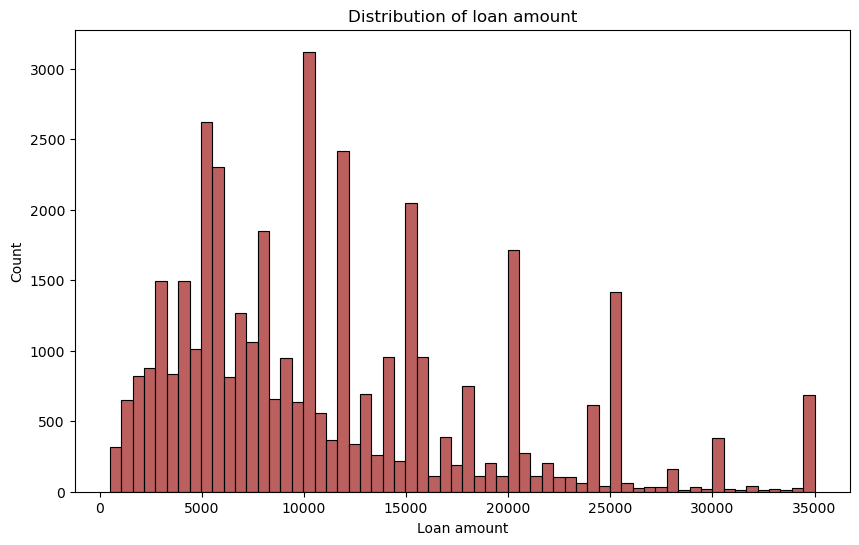

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df['loan_amnt'], color='brown')
plt.title('Distribution of loan amount')
plt.xlabel('Loan amount')
plt.ylabel('Count')
plt.show()

### 1.2 Most common loan terms


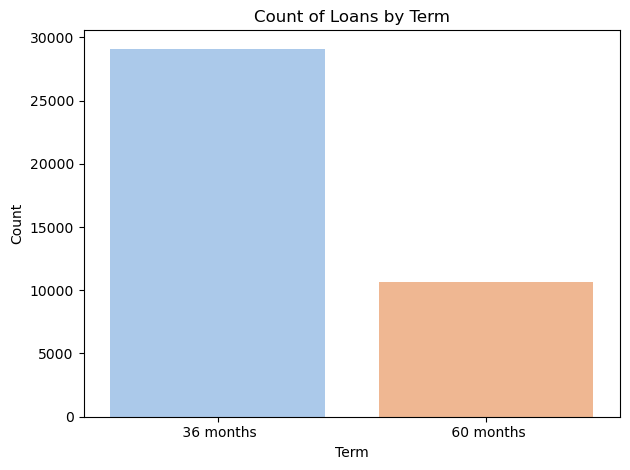

In [38]:
sns.countplot(x='term', data=df, palette='pastel')
plt.title('Count of Loans by Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 1.3 How much of the requested loan gets funded on average ?

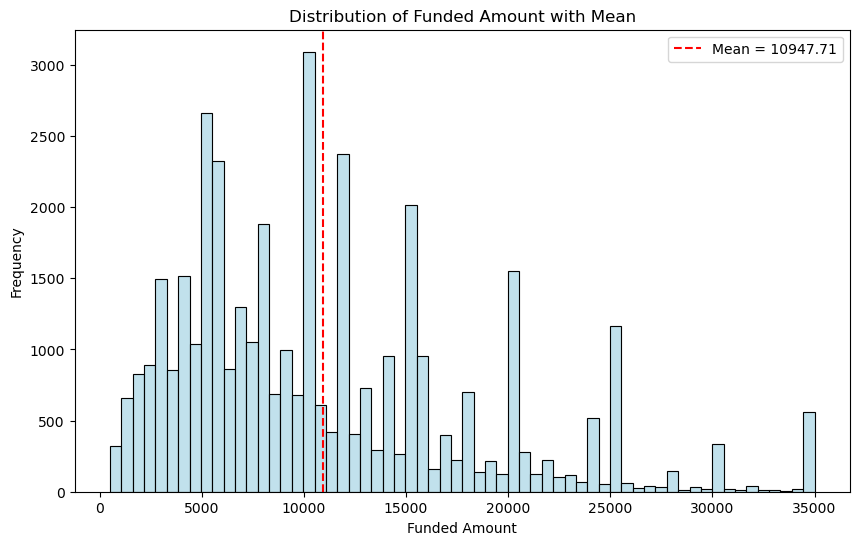

In [39]:
mean_value = df['funded_amnt'].mean()

plt.figure(figsize=(10,6))
sns.histplot(df['funded_amnt'], color='lightblue')
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean = {mean_value:.2f}')
plt.title('Distribution of Funded Amount with Mean')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### 1.4 Is there a difference between funded amount by lenders and investors

In [40]:
df[['funded_amnt', 'funded_amnt_inv']].describe()

,funded_amnt,funded_amnt_inv
count,39717.000000,39717.000000
mean,10947.713196,10397.448868
std,7187.238670,7128.450439
min,500.000000,0.000000
25%,5400.000000,5000.000000
50%,9600.000000,8975.000000
75%,15000.000000,14400.000000
max,35000.000000,35000.000000


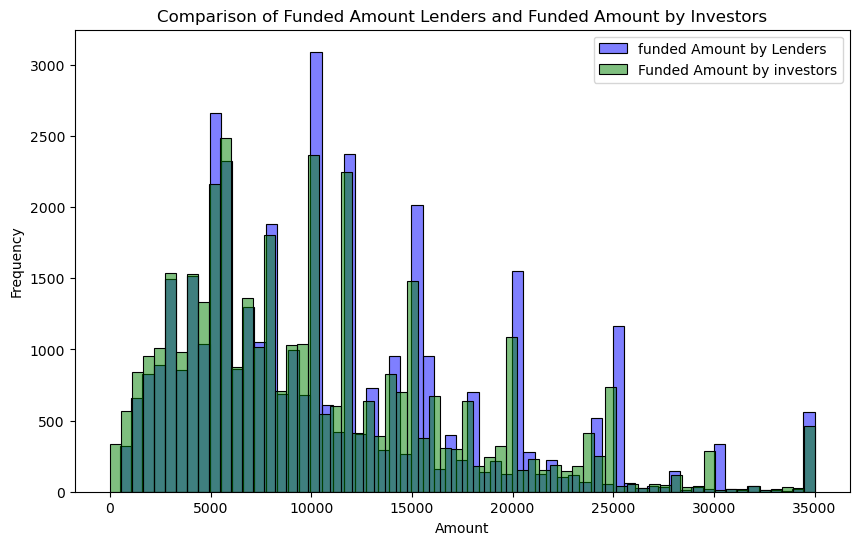

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df['funded_amnt'], color='blue', label='funded Amount by Lenders', alpha=0.5)
sns.histplot(df['funded_amnt_inv'], color='green', label='Funded Amount by investors', alpha=0.5)
plt.title('Comparison of Funded Amount Lenders and Funded Amount by Investors')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

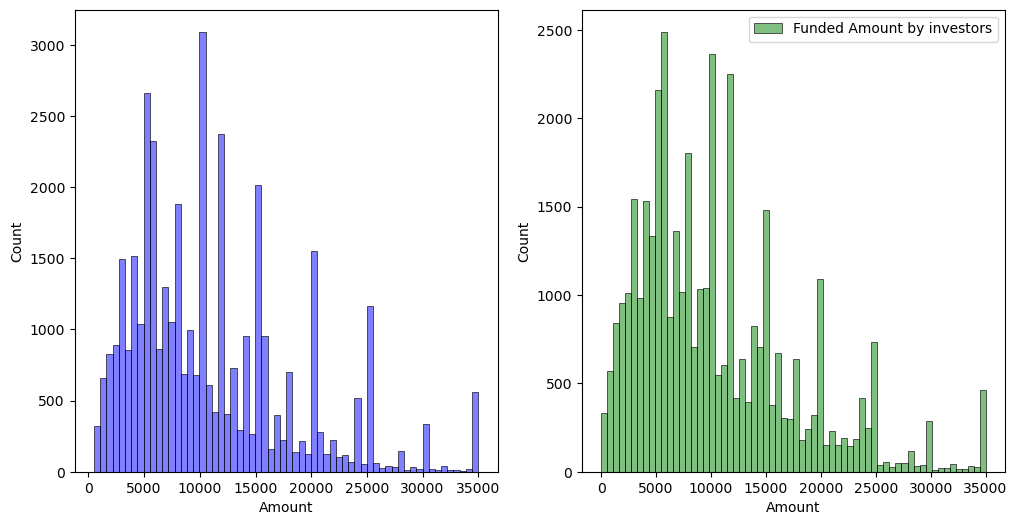

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df['funded_amnt'], color='blue', label='funded Amount by Lenders', alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['funded_amnt_inv'], color='green', label='Funded Amount by investors', alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Count')


plt.legend()
plt.show()

### 1.5 percentage of loans are issued for different terms

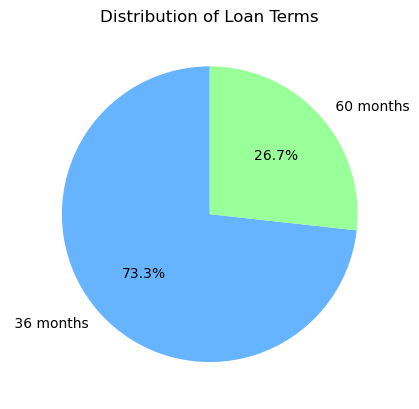

In [43]:
df['term'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title("Distribution of Loan Terms")
plt.ylabel("")
plt.show()

### 1.6 What is the average interest rate for each loan grade.

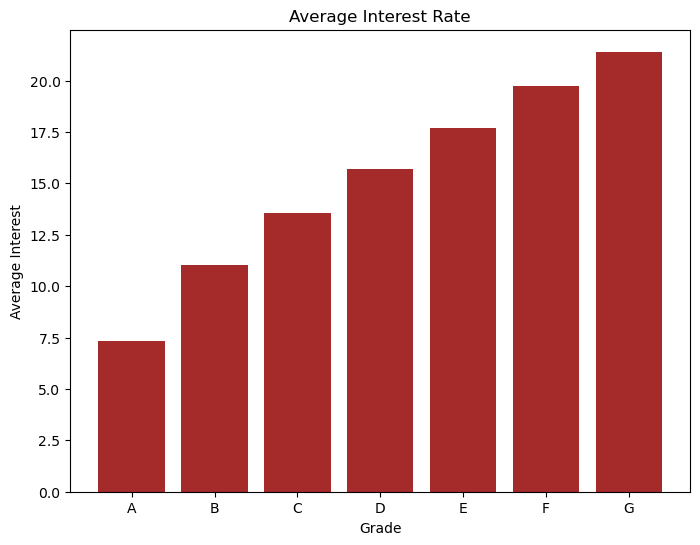

In [44]:
avg_interest = df.groupby('grade')['int_rate'].mean().reset_index()
plt.figure(figsize=(8,6))
plt.bar(avg_interest['grade'], avg_interest['int_rate'], color='brown')
plt.title('Average Interest Rate')
plt.xlabel('Grade')
plt.ylabel('Average Interest')
plt.show()

### 1.7 How much is the average monthly installment for different loan amounts?

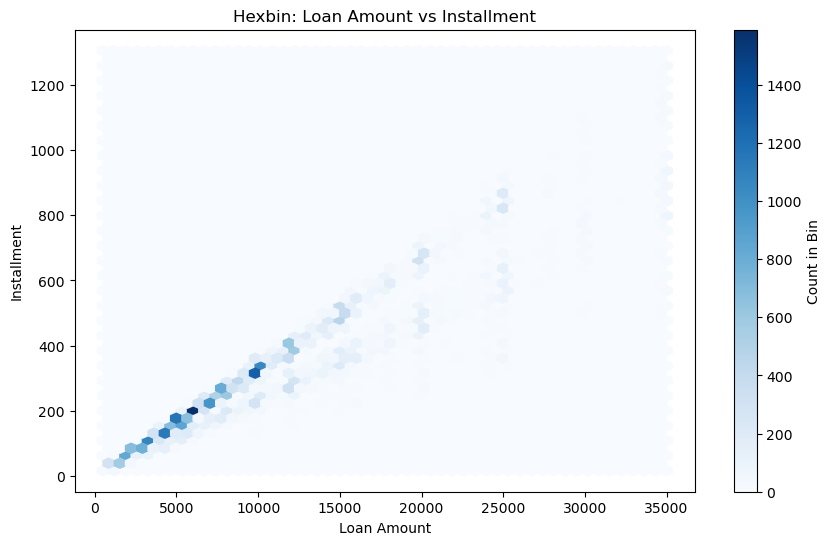

In [45]:
plt.figure(figsize=(10,6))
plt.hexbin(df['loan_amnt'], df['installment'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title("Hexbin: Loan Amount vs Installment")
plt.xlabel("Loan Amount")
plt.ylabel("Installment")
plt.show()


## 2. Borrower Characteristics

### 2.1 How many borrowers are in each credit grade.

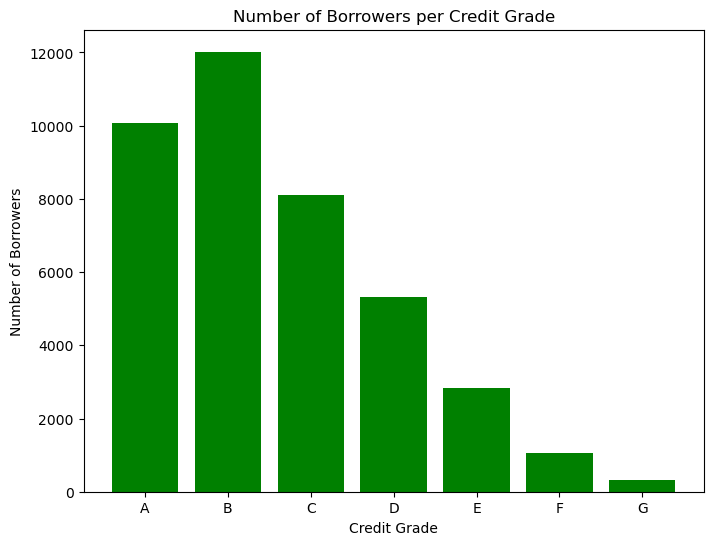

In [46]:
borrowers_per_grade = df.groupby('grade')['grade'].count()

plt.figure(figsize=(8,6))
plt.bar(borrowers_per_grade.index, borrowers_per_grade.values, color='g')
plt.title('Number of Borrowers per Credit Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Number of Borrowers')
plt.show()

### 2.2 How does home ownership relate to loan approval or interest rates.

In [47]:
home_status = df.groupby(['home_ownership', 'loan_status']).size().reset_index(name='count')
print(home_status)

   home_ownership  loan_status  count
0        MORTGAGE  Charged Off   2327
1        MORTGAGE      Current    638
2        MORTGAGE   Fully Paid  14694
3            NONE  Charged Off      0
4            NONE      Current      0
5            NONE   Fully Paid      3
6           OTHER  Charged Off     18
7           OTHER      Current      0
8           OTHER   Fully Paid     80
9             OWN  Charged Off    443
10            OWN      Current     83
11            OWN   Fully Paid   2532
12           RENT  Charged Off   2839
13           RENT      Current    419
14           RENT   Fully Paid  15641


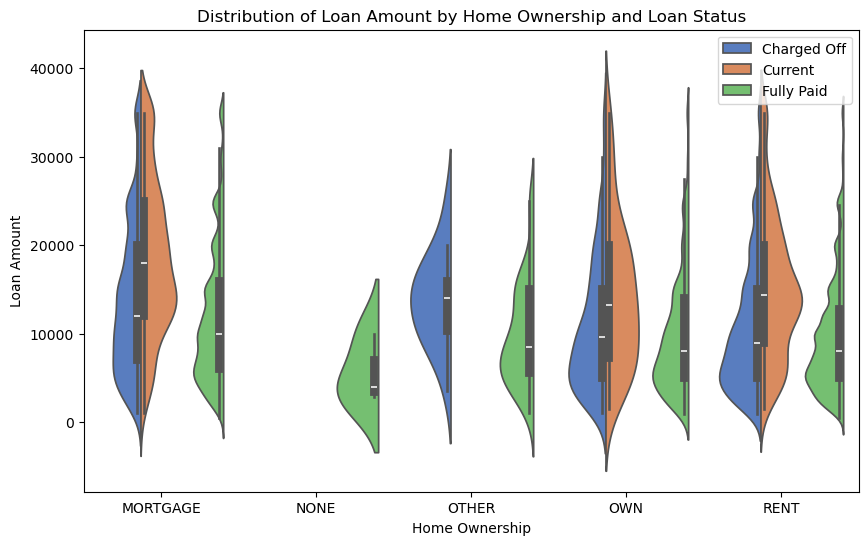

In [48]:
plt.figure(figsize=(10,6))
sns.violinplot(x='home_ownership', y='loan_amnt', hue='loan_status', 
               data=df, split=True, palette="muted")
plt.title("Distribution of Loan Amount by Home Ownership and Loan Status")
plt.xlabel("Home Ownership")
plt.ylabel("Loan Amount")
plt.legend(loc='upper right')
plt.show()

### 2.3 Does income verification impact loan funding and interest rates

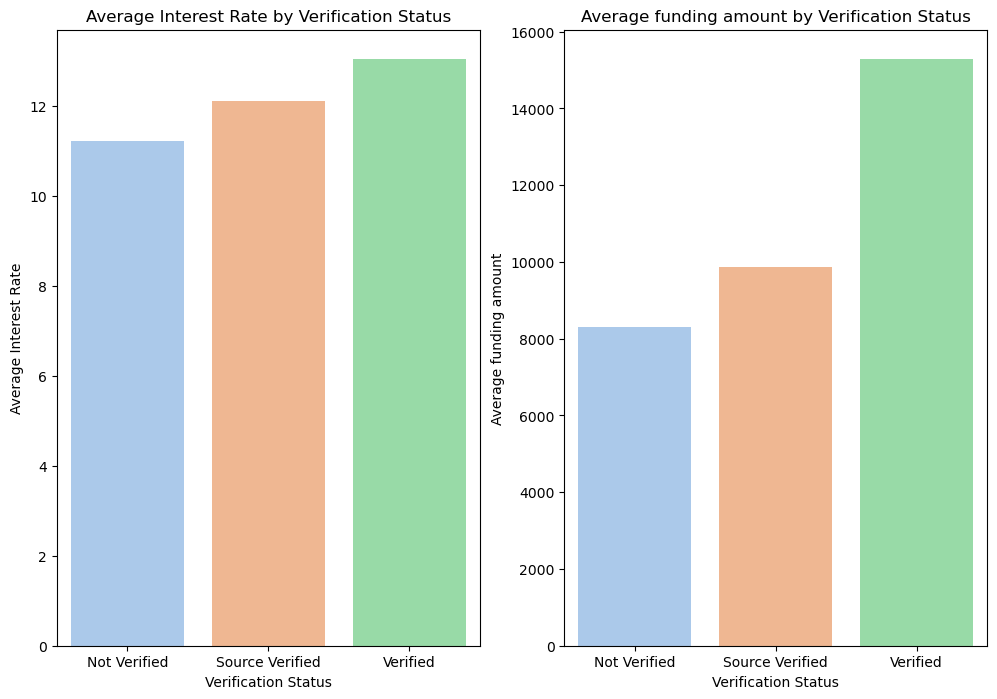

In [49]:
mean_int = df.groupby('verification_status')['int_rate'].mean().reset_index()
mean_fund = df.groupby('verification_status')['funded_amnt'].mean().reset_index()

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
sns.barplot(x='verification_status', y='int_rate', data=mean_int, palette='pastel')
plt.title('Average Interest Rate by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Average Interest Rate')

plt.subplot(1, 2, 2)
sns.barplot(x='verification_status', y='funded_amnt', data=mean_fund, palette='pastel')
plt.title('Average funding amount by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Average funding amount')


plt.show()

### 2.4 How many borrowers fall into each delinquency category

In [50]:
delinq_counts = df['delinq_flag'].value_counts()
print(delinq_counts)

delinq_flag
No       35405
Maybe     4294
Yes         18
Name: count, dtype: int64


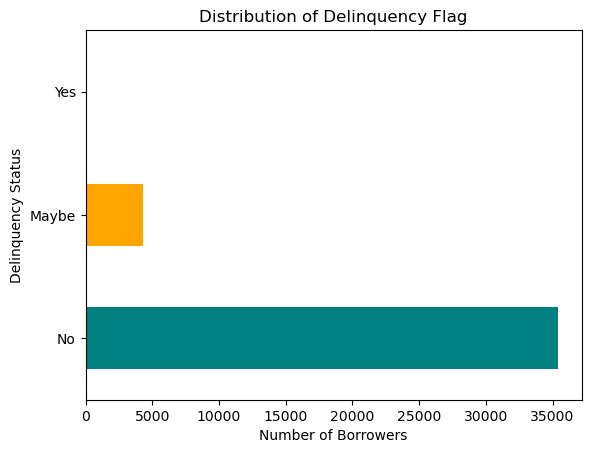

In [51]:
delinq_counts = df['delinq_flag'].value_counts()

delinq_counts.plot(kind='barh', color=['teal','orange','purple'])

plt.title("Distribution of Delinquency Flag")
plt.xlabel("Number of Borrowers")
plt.ylabel("Delinquency Status")
plt.show()

### 2.5 Distribution of Borrowers by Employment Length

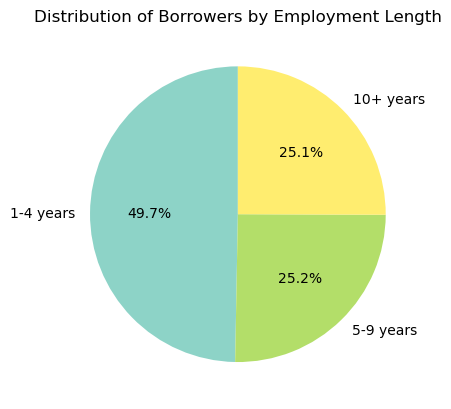

In [52]:
df['emp_length'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title("Distribution of Borrowers by Employment Length")
plt.ylabel("")
plt.show()


## 3. Loan Performance & Status

### 3.1 Loan Status

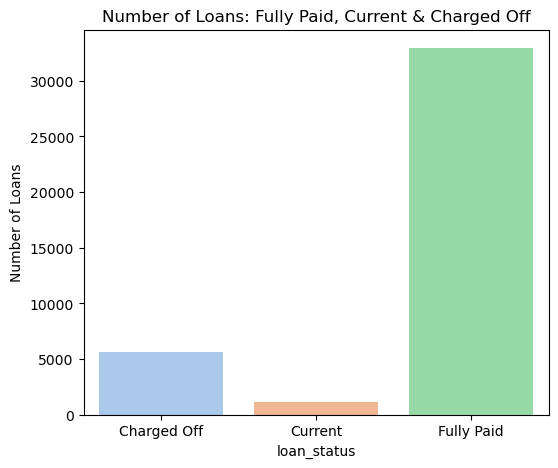

In [53]:
loan_counts = df['loan_status'].value_counts()

plt.figure(figsize=(6,5))
sns.barplot(x=loan_counts.index, y=loan_counts.values, palette='pastel')
plt.title('Number of Loans: Fully Paid, Current & Charged Off')
plt.ylabel('Number of Loans')
plt.show()


### 3.2 Loan Purpose vs Full Repayment

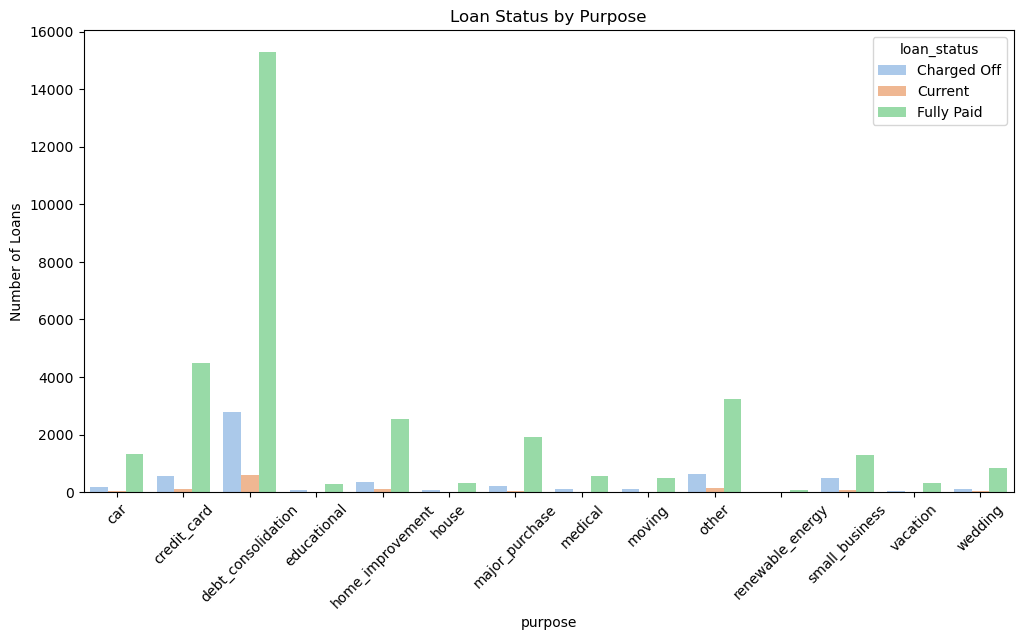

In [54]:
purpose_status = df.groupby(['purpose', 'loan_status']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(x='purpose', y='count', hue='loan_status', data=purpose_status, palette='pastel')
plt.title('Loan Status by Purpose')
plt.xticks(rotation=45)
plt.ylabel('Number of Loans')
plt.show()

### 3.3 Debt-to-Income Ratio (dti) vs Loan Default

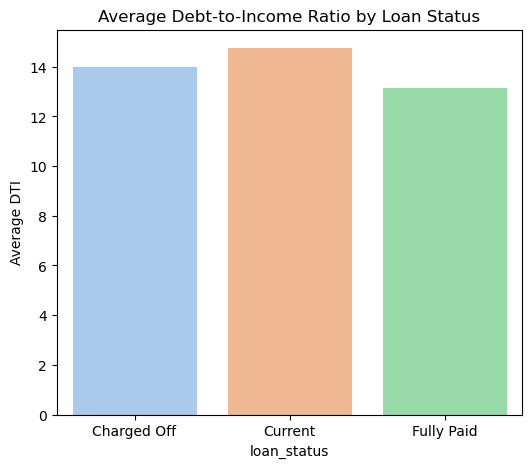

In [55]:
dti_avg = df.groupby('loan_status')['dti'].mean().reset_index()
plt.figure(figsize=(6,5))
sns.barplot(x='loan_status', y='dti', data=dti_avg, palette='pastel')
plt.title('Average Debt-to-Income Ratio by Loan Status')
plt.ylabel('Average DTI')
plt.show()


### 3.4 Delinquencies in Last 2 Years

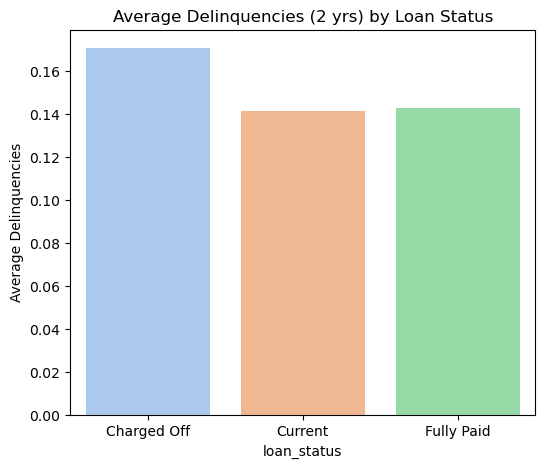

In [56]:
delinq_avg = df.groupby('loan_status')['delinq_2yrs'].mean().reset_index()
plt.figure(figsize=(6,5))
sns.barplot(x='loan_status', y='delinq_2yrs', data=delinq_avg, palette='pastel')
plt.title('Average Delinquencies (2 yrs) by Loan Status')
plt.ylabel('Average Delinquencies')
plt.show()


### 3.5 Credit Inquiries in Last 6 Months

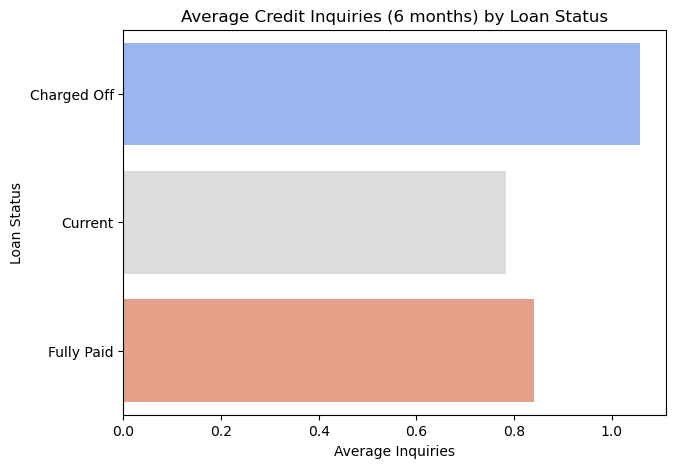

In [57]:
inq_avg = df.groupby('loan_status')['inq_last_6mths'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(y='loan_status', x='inq_last_6mths', data=inq_avg, palette='coolwarm')
plt.title('Average Credit Inquiries (6 months) by Loan Status')
plt.xlabel('Average Inquiries')
plt.ylabel('Loan Status')
plt.show()


### 3.6 Open Accounts / Total Accounts vs Loan Performance

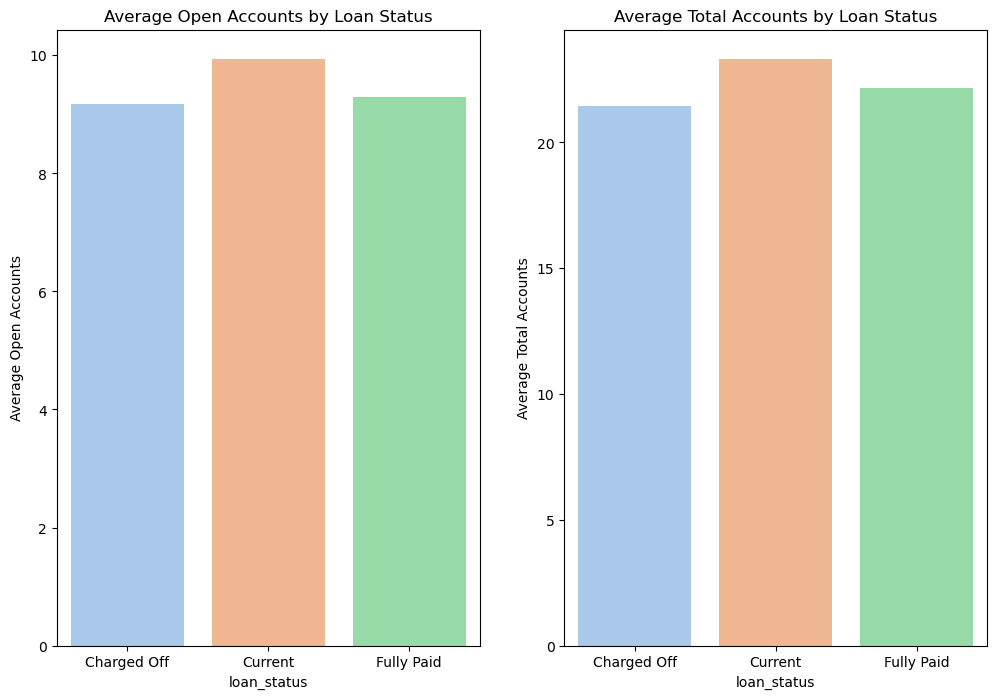

In [58]:
open_acc_avg = df.groupby('loan_status')['open_acc'].mean().reset_index()
total_acc_avg = df.groupby('loan_status')['total_acc'].mean().reset_index()

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
sns.barplot(x='loan_status', y='open_acc', data=open_acc_avg, palette='pastel')
plt.title('Average Open Accounts by Loan Status')
plt.ylabel('Average Open Accounts')

plt.subplot(1, 2, 2)
sns.barplot(x='loan_status', y='total_acc', data=total_acc_avg, palette='pastel')
plt.title('Average Total Accounts by Loan Status')
plt.ylabel('Average Total Accounts')
plt.show()


### 3.7 Average Total Payment by Loan Grade

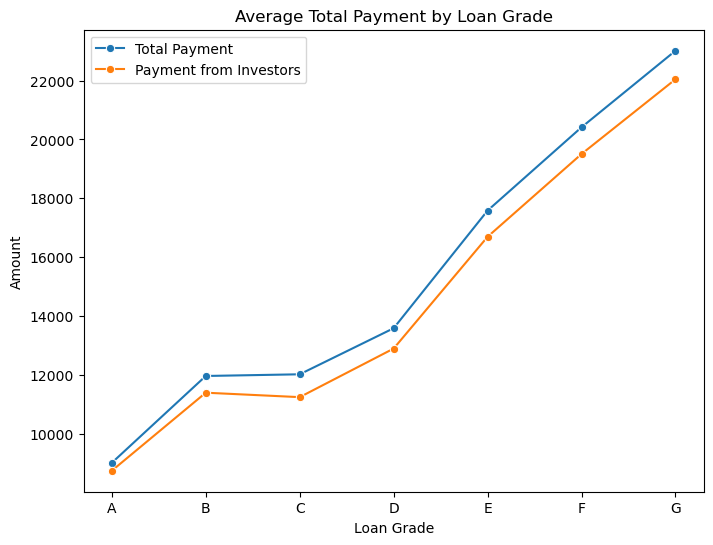

In [59]:
avg_payment = df.groupby('grade')[['total_pymnt', 'total_pymnt_inv']].mean().reset_index()

plt.figure(figsize=(8,6))
sns.lineplot(x='grade', y='total_pymnt', data=avg_payment, marker='o', label='Total Payment')
sns.lineplot(x='grade', y='total_pymnt_inv', data=avg_payment, marker='o', label='Payment from Investors')
plt.title('Average Total Payment by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Amount')
plt.legend()
plt.show()


### 3.8 Public Records / Bankruptcies vs Loan Status

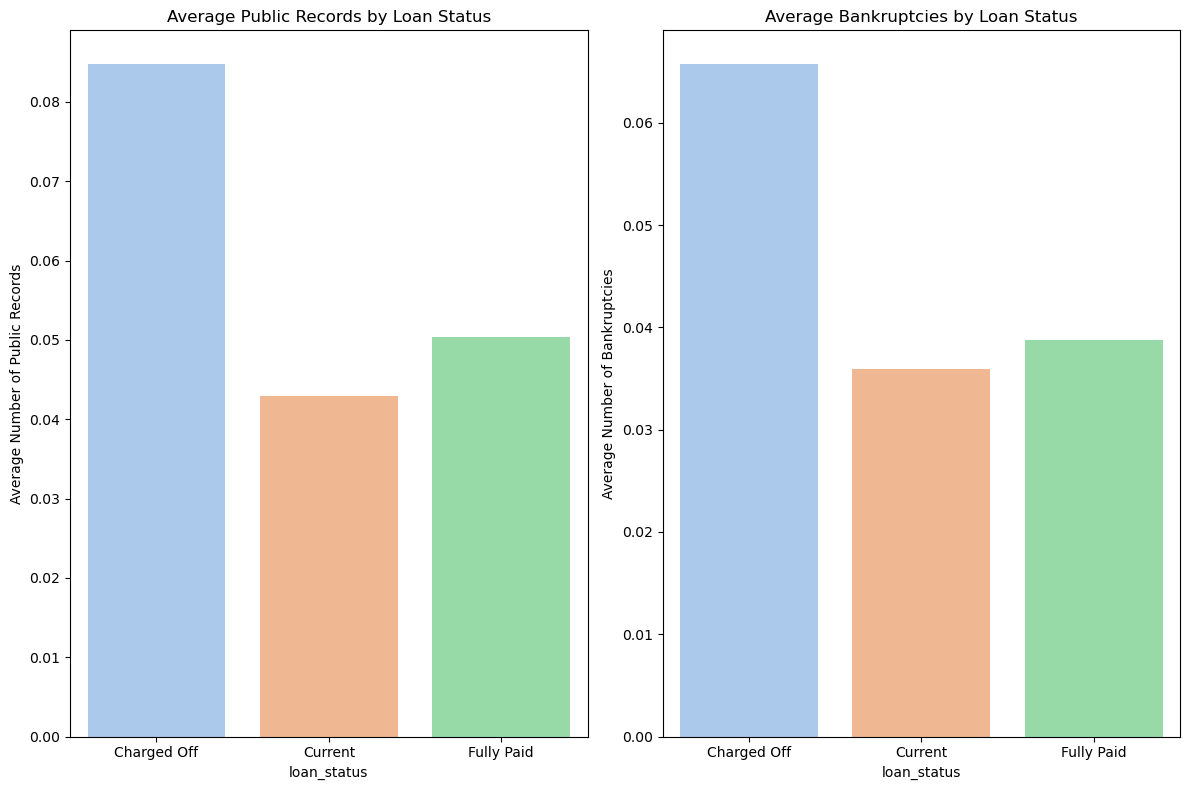

In [60]:
pub_avg = df.groupby('loan_status')['pub_rec'].mean().reset_index()
bank_avg = df.groupby('loan_status')['pub_rec_bankruptcies'].mean().reset_index()

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
sns.barplot(x='loan_status', y='pub_rec', data=pub_avg, palette='pastel')
plt.title('Average Public Records by Loan Status')
plt.ylabel('Average Number of Public Records')

plt.subplot(1, 2, 2)
sns.barplot(x='loan_status', y='pub_rec_bankruptcies', data=bank_avg, palette='pastel')
plt.title('Average Bankruptcies by Loan Status')
plt.ylabel('Average Number of Bankruptcies')

plt.tight_layout()
plt.show()

## 4. Calculated Features

### 4.1 Average Principal & Interest Paid Ratios by Loan Status

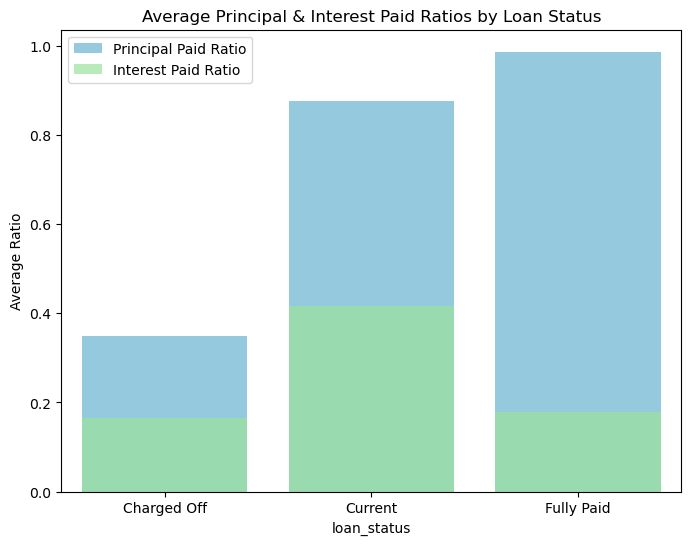

In [61]:
avg_ratios = df.groupby('loan_status')[['principal_paid_ratio', 'interest_paid_ratio']].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='loan_status', y='principal_paid_ratio', data=avg_ratios, color='skyblue', label='Principal Paid Ratio')
sns.barplot(x='loan_status', y='interest_paid_ratio', data=avg_ratios, color='lightgreen', label='Interest Paid Ratio', alpha=0.7)
plt.title('Average Principal & Interest Paid Ratios by Loan Status')
plt.ylabel('Average Ratio')
plt.legend()
plt.show()

### 4.2 Debt Ratio vs Loan Status

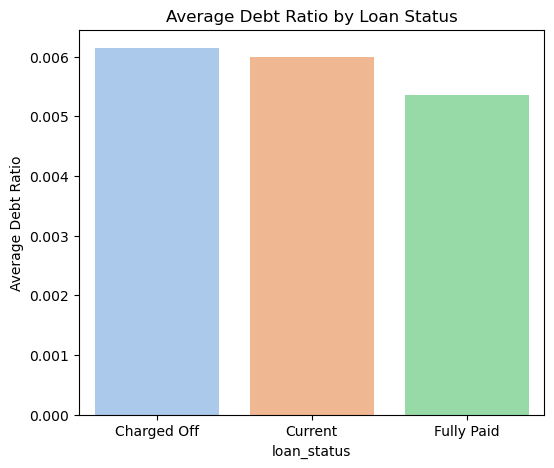

In [62]:
debt_avg = df.groupby('loan_status')['debt_ratio'].mean().reset_index()
plt.figure(figsize=(6,5))
sns.barplot(x='loan_status', y='debt_ratio', data=debt_avg, palette='pastel')
plt.title('Average Debt Ratio by Loan Status')
plt.ylabel('Average Debt Ratio')
plt.show()


### 4.3 Credit History Length vs Default Probability

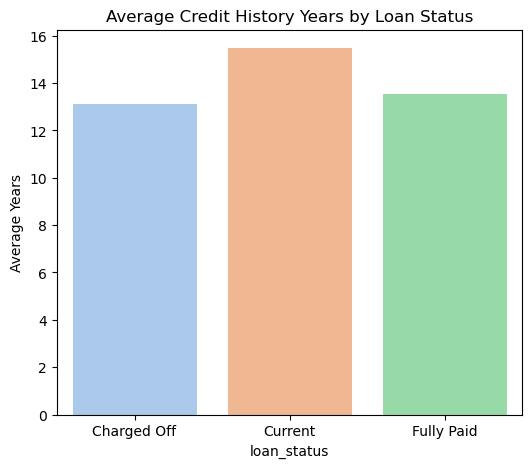

In [63]:
credit_avg = df.groupby('loan_status')['credit_history_years'].mean().reset_index()
plt.figure(figsize=(6,5))
sns.barplot(x='loan_status', y='credit_history_years', data=credit_avg, palette='pastel')
plt.title('Average Credit History Years by Loan Status')
plt.ylabel('Average Years')
plt.show()


### 4.4 Delinquency Flag vs Loan Status

In [64]:
delinq_counts = df.groupby(['delinq_flag', 'loan_status']).size().reset_index(name='count')
print(delinq_counts)

  delinq_flag  loan_status  count
0       Maybe  Charged Off    688
1       Maybe      Current    121
2       Maybe   Fully Paid   3485
3          No  Charged Off   4936
4          No      Current   1019
5          No   Fully Paid  29450
6         Yes  Charged Off      3
7         Yes      Current      0
8         Yes   Fully Paid     15


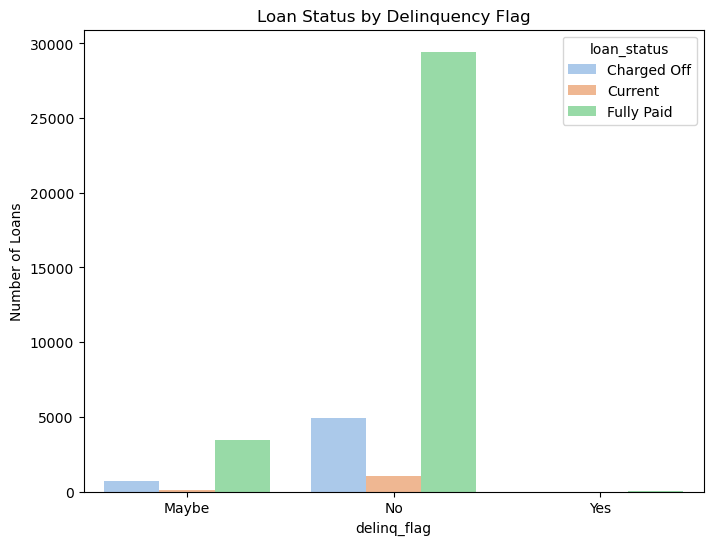

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(x='delinq_flag', y='count', hue='loan_status', data=delinq_counts, palette='pastel')
plt.title('Loan Status by Delinquency Flag')
plt.ylabel('Number of Loans')
plt.show()

### 4.5 Grades Levels for Delinquency Categories

In [66]:
grade_delinq = df.groupby(['grade', 'delinq_flag']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
print(grade_delinq)

   grade delinq_flag  count
0      A       Maybe    395
1      A          No   9690
2      A         Yes      0
3      B       Maybe   1093
4      B          No  10923
5      B         Yes      4
6      C       Maybe   1098
7      C          No   6995
8      C         Yes      5
9      D       Maybe    916
10     D          No   4387
11     D         Yes      4
12     E       Maybe    483
13     E          No   2357
14     E         Yes      2
15     F       Maybe    228
16     F          No    819
17     F         Yes      2
18     G       Maybe     81
19     G          No    234
20     G         Yes      1


<Figure size 1200x600 with 0 Axes>

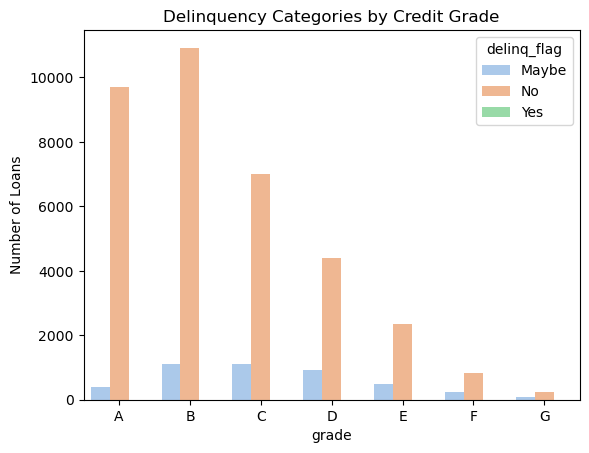

In [67]:
sns.barplot(x='grade', y='count', hue='delinq_flag', data=grade_delinq, palette='pastel')
plt.title('Delinquency Categories by Credit Grade')
plt.ylabel('Number of Loans')
plt.show()

## 5. Time-based Analysis

### 5.1 Loan Issue Date vs Default Trends

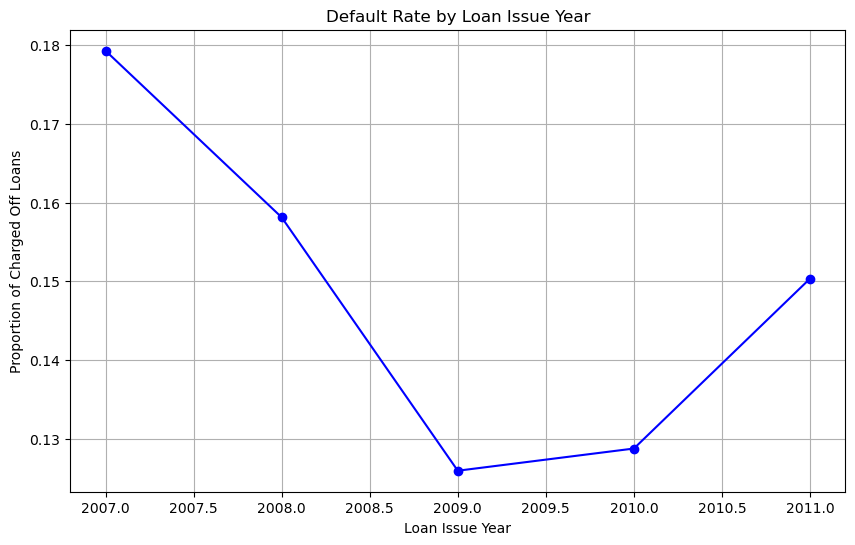

In [68]:
df['issue_year'] = df['issue_d'].dt.year
default_trend = df.groupby('issue_year')['loan_status'].apply(lambda x: (x=='Charged Off').mean()).reset_index(name='default_rate')

plt.figure(figsize=(10,6))
plt.plot(default_trend['issue_year'], default_trend['default_rate'], marker='o', color='blue')
plt.title('Default Rate by Loan Issue Year')
plt.xlabel('Loan Issue Year')
plt.ylabel('Proportion of Charged Off Loans')
plt.grid(True)
plt.show()

### 5.2 Loan issued per yeaer

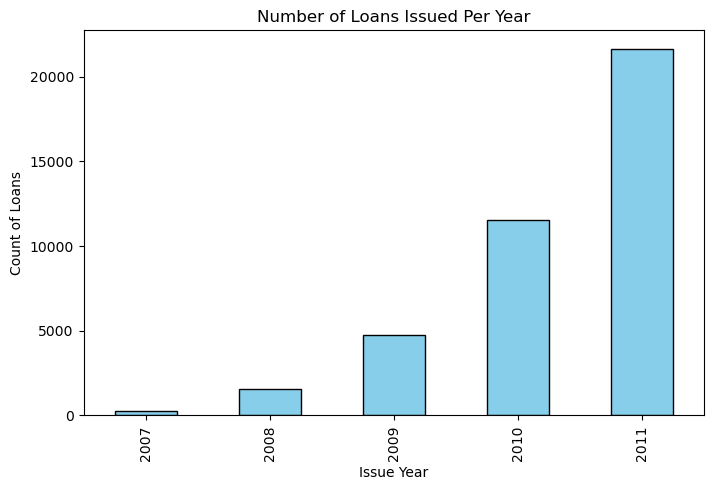

In [69]:
loan_per_year = df.groupby('issue_year').size()

plt.figure(figsize=(8,5))
loan_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Loans Issued Per Year")
plt.xlabel("Issue Year")
plt.ylabel("Count of Loans")
plt.show()

### 5.3 Average loan amount over time 

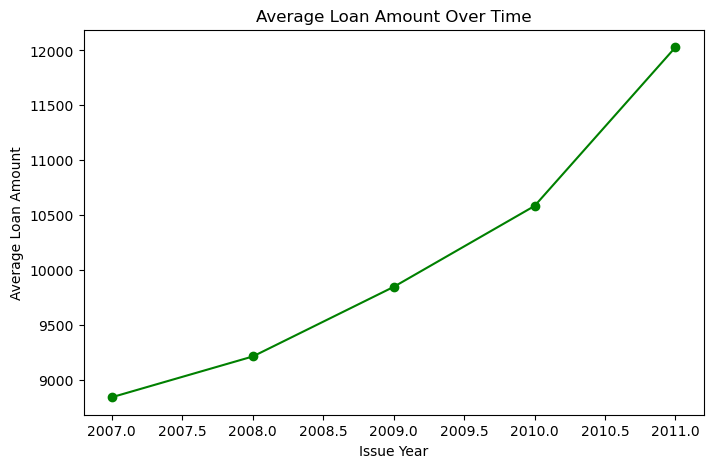

In [70]:
loan_amount_trend = df.groupby('issue_year')['loan_amnt'].mean()

plt.figure(figsize=(8,5))
loan_amount_trend.plot(marker='o', linestyle='-', color='green')
plt.title("Average Loan Amount Over Time")
plt.xlabel("Issue Year")
plt.ylabel("Average Loan Amount")
plt.show()


### 5.4 Loan Purpose Distribution Over Time

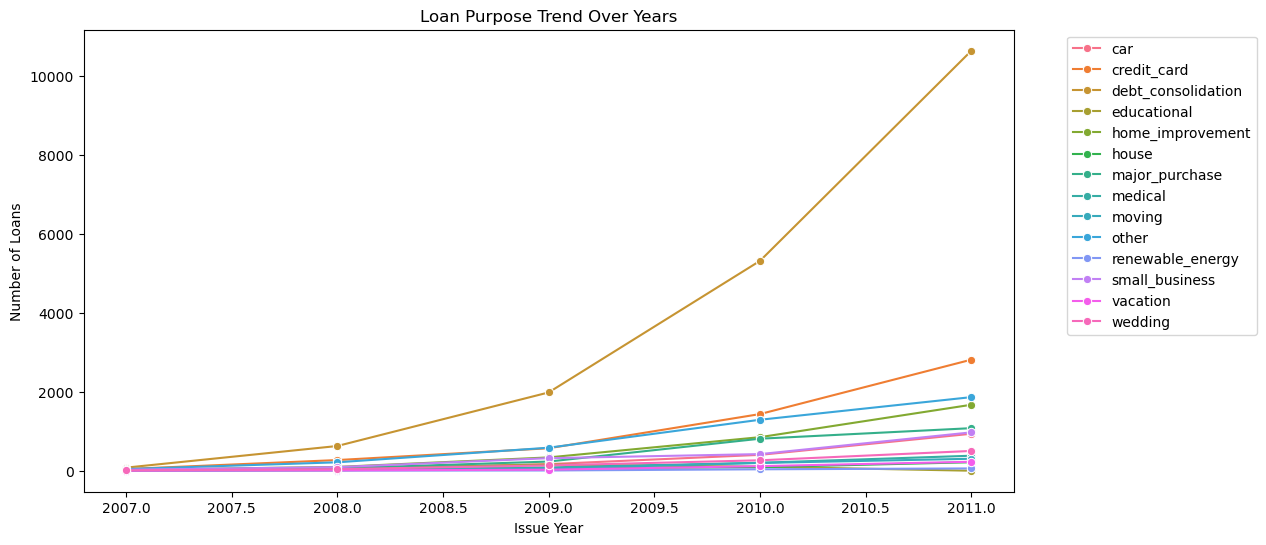

In [71]:
purpose_year = df.groupby(['issue_year','purpose']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(x='issue_year', y='count', hue='purpose', data=purpose_year, marker='o')
plt.title("Loan Purpose Trend Over Years")
plt.xlabel("Issue Year")
plt.ylabel("Number of Loans")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 5.5 Monthly Trend of Total Funded Amount

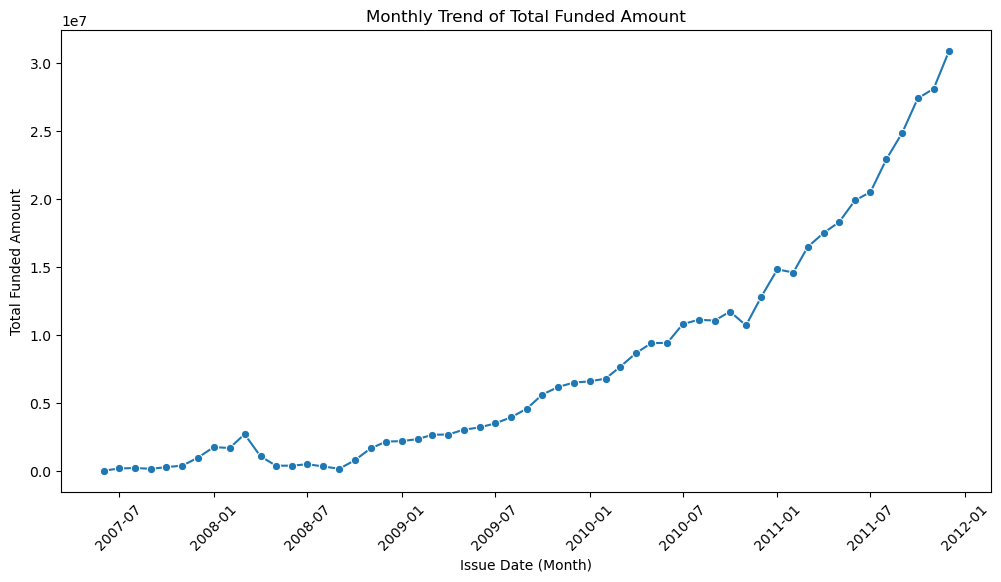

In [72]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
funded_trend = df.groupby(df['issue_d'].dt.to_period('M'))['funded_amnt'].sum().reset_index()
funded_trend['issue_d'] = funded_trend['issue_d'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(x='issue_d', y='funded_amnt', data=funded_trend, marker='o')
plt.title('Monthly Trend of Total Funded Amount')
plt.xlabel('Issue Date (Month)')
plt.ylabel('Total Funded Amount')
plt.xticks(rotation=45)
plt.show()

## 6. Correlation Analysis

### 6.1 Average Loan Amount by Grade & Year

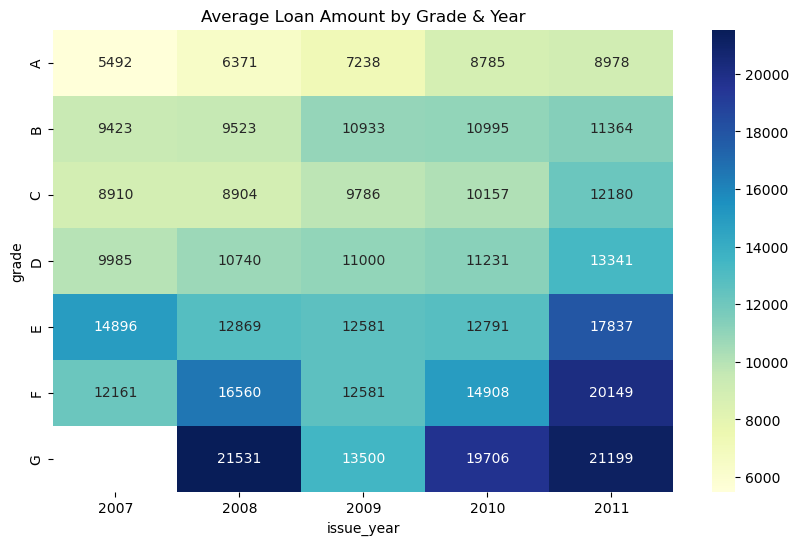

In [73]:
pivot = df.pivot_table(values='loan_amnt', index='grade', columns='issue_year', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Loan Amount by Grade & Year")
plt.show()

### 6.2 How is loan_amnt related to funded_amnt

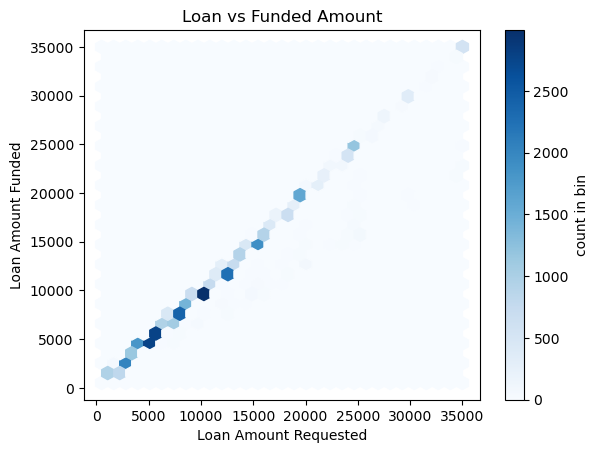

In [74]:
plt.hexbin(df['loan_amnt'], df['funded_amnt'], gridsize=30, cmap="Blues")
plt.colorbar(label="count in bin")
plt.xlabel("Loan Amount Requested")
plt.ylabel("Loan Amount Funded")
plt.title("Loan vs Funded Amount")
plt.show()

### 6.3 Correlation Heatmap with Interest Rate

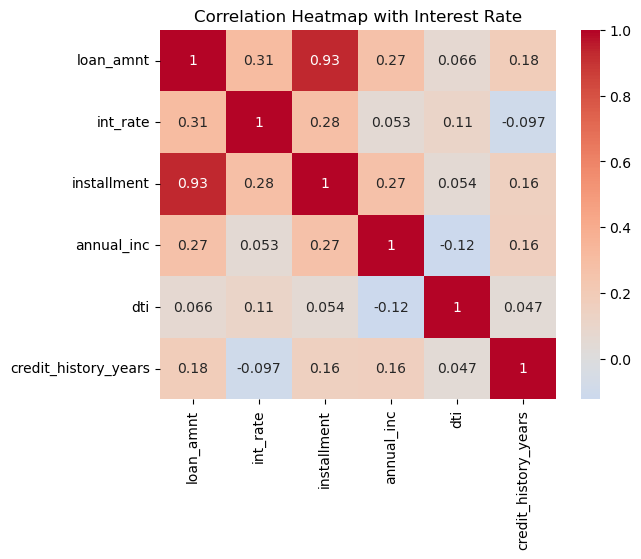

In [75]:
corr = df[['loan_amnt','int_rate','installment','annual_inc','dti','credit_history_years']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap with Interest Rate")
plt.show()

### 6.4 Does higher loan_amnt lead to higher installment values?

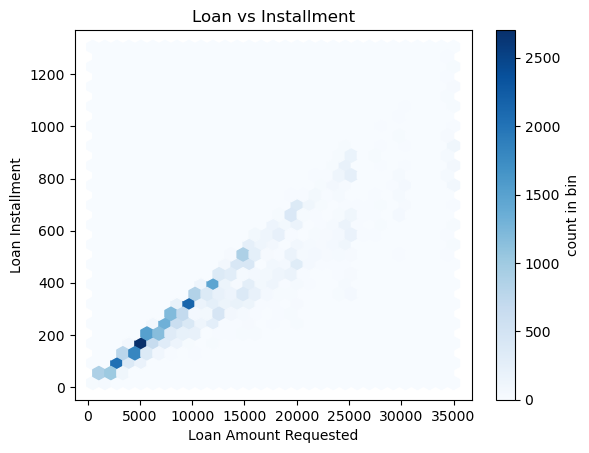

In [76]:
plt.hexbin(df['loan_amnt'], df['installment'], gridsize=30, cmap="Blues")
plt.colorbar(label="count in bin")
plt.xlabel("Loan Amount Requested")
plt.ylabel("Loan Installment")
plt.title("Loan vs Installment")
plt.show()

### 6.5 Is there multicollinearity between total_rec_prncp, principal_paid_ratio, and loan_amnt

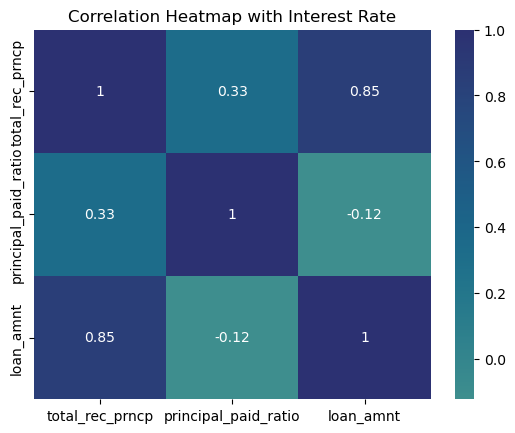

In [77]:
corr = df[['total_rec_prncp', 'principal_paid_ratio', 'loan_amnt']].corr()
sns.heatmap(corr, annot=True, cmap="crest", center=0)
plt.title("Correlation Heatmap with Interest Rate")
plt.show()

# 📄 Loan Data Analysis – Documentation  

## 1. Introduction  
The purpose of this assignment is to explore, clean, and analyze a loan dataset to understand borrower characteristics, loan funding details, repayment performance, and risk-related factors.  

The analysis involves:  
- Data Cleaning  
- Feature Reduction  
- Feature Engineering  
- Exploratory Data Analysis (EDA)  
- Insights from Loan Funding, Borrower Profiles, Loan Status, and Time-based Trends  

---

## 2. Libraries Used  
The following Python libraries were used:  
- **pandas** → Data manipulation and analysis  
- **numpy** → Numerical computations  
- **matplotlib / seaborn** → Data visualization  
- **datetime** → Handling date/time values  


---

## 3. Data Exploration  

### 3.1 Dataset Overview  
- Dataset loaded into a pandas DataFrame.  
- Initial inspection done: shape, column names, data types.  
- Dataset initially had **111 columns**.  

---

## 4. Data Cleaning – 001  

1. **Handling Missing Values**  
   - Dropped all columns with **100% missing values (54 columns)**.  
   - Removed columns with **>30% missing values**.  
   - Replaced `NaN` in categorical columns: **'emp_title', 'title'** → `"Unknown"`.  
   - Removed rows with missing values in **'last_pymnt_d', 'last_credit_pull_d'** (converted to datetime).  
   - Replaced missing values in numerical columns using **mean imputation**:  
     - `collections_12_mths_ex_med`  
     - `chargeoff_within_12_mths`  
     - `pub_rec_bankruptcies`  
     - `tax_liens`  
   - Filled missing values in **'emp_length'** with `"0 years"`.  

2. **Duplicate Check**  
   - Verified no duplicate rows remained.  

---

## 5. Feature Reduction  

- Classified dataset columns into **categories**:  

| Type | Columns |  
|------|----------|  
| **Discrete (intCols)** | delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, total_acc, total_rec_prncp, total_rec_int, pub_rec_bankruptcies |  
| **Continuous (floatCols)** | loan_amnt, funded_amnt, funded_amnt_inv, annual_inc, installment, dti, last_pymnt_amnt, total_pymnt, total_pymnt_inv, revol_util |  
| **Categorical (catCols)** | grade, home_ownership, verification_status, loan_status, purpose, term |  
| **Categorical to Numeric (catColstoNum)** | int_rate, emp_length |  
| **Date (dateCols)** | issue_d, earliest_cr_line |  

- Dropped irrelevant or redundant columns after evaluation.  

---

## 6. Data Cleaning – 002  

- Converted **date columns** (`issue_d`, `earliest_cr_line`, `last_pymnt_d`) to datetime format.  
- Converted **string-based numerical columns** (e.g., `int_rate`, `emp_length`) into numeric values.  
- Finalized column data types for consistency.  

---

## 7. Feature Engineering  

1. **Categorical Encoding**  
   - Applied one-hot encoding and label encoding where required.  

2. **Derived Features**  
   - `principal_paid_ratio = total_rec_prncp / loan_amnt`  
   - `interest_paid_ratio = total_rec_int / loan_amnt`  
   - `debt_ratio = installment / annual_inc`  
   - `credit_history_years = issue_d.year - earliest_cr_line.year`  
   - `delinq_flag` = Categorized delinquency status (`No`, `Maybe`, `Yes`)  

3. **Final Feature Set**  

**Loan & Funding Information**  
- loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment  

**Borrower Characteristics**  
- grade, emp_length, home_ownership, annual_inc, verification_status  

**Loan Performance & Status**  
- issue_d, loan_status, purpose, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, last_pymnt_amnt, pub_rec_bankruptcies  

**Engineered Features**  
- principal_paid_ratio, interest_paid_ratio, debt_ratio, credit_history_years, delinq_flag  

---

## 8. Data Analysis & Insights  

### 8.1 Loan & Funding Information  
- Distribution of loan amounts requested by borrowers  
- Most common loan terms  
- Average funded vs requested loan amount  
- Difference between funded amount (lenders vs investors)  
- Percentage of loans issued per term  
- Average interest rate by loan grade  
- Average installment amount across loan categories  

### 8.2 Borrower Characteristics  
- Borrower distribution by credit grade  
- Home ownership vs loan approval / interest rate  
- Income verification vs funding & interest  
- Borrower delinquency distribution  
- Borrowers by employment length  

### 8.3 Loan Performance & Status  
- Loan status distribution  
- Loan purpose vs repayment outcome  
- Debt-to-Income Ratio (DTI) vs default risk  
- Delinquencies in last 2 years vs repayment  
- Credit inquiries (last 6 months) vs default  
- Open accounts & total accounts vs performance  
- Average repayment by loan grade  
- Bankruptcies vs loan status  

### 8.4 Engineered Features  
- Principal & interest ratios vs loan status  
- Debt ratio vs repayment behavior  
- Credit history length vs default probability  
- Delinquency flag vs loan performance  
- Grade levels vs delinquency  

### 8.5 Time-based Analysis  
- Loan issue date vs default trends  
- Loans issued per year  
- Average loan amount over time  
- Loan purpose distribution over time  
- Monthly trend of total funded amount  

### 8.6 Correlation Analysis  
- Average loan amount by grade & year  
- Loan amount vs funded amount  
- Correlation heatmap with interest rate  
- Loan amount vs installment values  
- Multicollinearity check: `total_rec_prncp`, `principal_paid_ratio`, `loan_amnt`  

---

## 9. Conclusion  

- Dataset was successfully cleaned, reduced, and transformed.  
- Derived features such as **debt ratio, principal/interest paid ratio, and credit history years** gave additional insights.  
- Analysis highlighted patterns in loan issuance, borrower demographics, repayment behaviors, and financial risk.  
- Findings can assist in predictive modeling for **loan default classification** and **credit risk management**.  


# BRYAN JAPHETH CHARLES